# <font color='red'> Code Instalation</font>

In [1]:
from Nutridf import NutriClean

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
!pip install missingno 
import missingno as msno
import warnings
import scipy.stats as stats

warnings.filterwarnings("ignore")

from scipy.stats import f_oneway

In [2]:
from sklearn import preprocessing
import numpy as np
from sklearn.impute import KNNImputer

# <font color='red'> !!!YOU CAN START FROM HERE NOW  NO NEED TO REDO ALL !!!

In [5]:
#df.to_csv('Check_point1.csv',index = False)
df = pd.read_csv('Check_point1.csv')

# <font color='red'> 14) Automatic formula

In [6]:
fibre_mean_df = pd.DataFrame(df.groupby('nutriscore_grade')['fiber_100g'].mean())

#df.groupby('nutriscore_grade')['nutriscore_grade'] == 'a'
def replace_null(x,mean):
    if np.isnan(x):
        return mean
    else:
        return x
a_mean = fibre_mean_df.loc['a','fiber_100g']
b_mean = fibre_mean_df.loc['b','fiber_100g']
c_mean = fibre_mean_df.loc['c','fiber_100g']
d_mean = fibre_mean_df.loc['d','fiber_100g']
e_mean = fibre_mean_df.loc['e','fiber_100g']

df.loc[df['nutriscore_grade'] == 'a','fiber_100g']= df[df['nutriscore_grade'] == 'a']['fiber_100g'].apply(lambda x :replace_null(x,a_mean))

df.loc[df['nutriscore_grade'] == 'b','fiber_100g']= df[df['nutriscore_grade'] == 'b']['fiber_100g'].apply(lambda x :replace_null(x,b_mean))

df.loc[df['nutriscore_grade'] == 'c','fiber_100g']= df[df['nutriscore_grade'] == 'c']['fiber_100g'].apply(lambda x :replace_null(x,c_mean))

df.loc[df['nutriscore_grade'] == 'd','fiber_100g']= df[df['nutriscore_grade'] == 'd']['fiber_100g'].apply(lambda x :replace_null(x,d_mean))

df.loc[df['nutriscore_grade'] == 'e','fiber_100g']= df[df['nutriscore_grade'] == 'e']['fiber_100g'].apply(lambda x :replace_null(x,e_mean))



In [7]:
NutriClean

<function Nutridf.NutriClean(data)>

In [8]:
df= NutriClean(df)

In [9]:
def nutri_score(e,su,so,sa,po): #,fi
    if((np.isnan(e)) or (np.isnan(su)) or (np.isnan(so)) or (np.isnan(sa)) or (np.isnan(po)) ): #or (np.isnan(fi))
        return np.nan
    else:
        return (e + su +so+sa-po  -3) #-fi 
    # I have removed Fiber because my PC is not albe to manage a KNNimputer of that size
    
df['nutriscore_score'] = df.apply(
    lambda row :nutri_score(row['energy_100g_N'] , row['sugars_100g_N'] , 
                            row['sodium_100g_N'] , row['saturated-fat_100g_N'] , 
                            row['proteins_100g_N']),axis = 1)  #     ,row['fiber_100g_N']

# <font color='red'> 14.1) Premaring the DF for several cases 
    dfKNAP for KNAPSCACK
    dfX for  KNN
    dfchi for Chi2 
    df for

In [ ]:
# 100% clean data for testing

In [5]:
dfX = df[["nova_group","nutriscore_grade","nutriscore_score",'energy_100g',"energy-kcal_100g","fat_100g","saturated-fat_100g",
          "sugars_100g","proteins_100g","sodium_100g","salt_100g","fiber_100g","carbohydrates_100g","countries_en"]]#
dfKNAP = df[["nutriscore_grade","nutriscore_score",'energy_100g',"energy-kcal_100g","fat_100g","saturated-fat_100g",
             "sugars_100g","proteins_100g","sodium_100g","salt_100g","fiber_100g","carbohydrates_100g","countries_en"]]#
dfchi = df[["nova_group","nutriscore_grade","nutriscore_score",'energy_100g',"energy-kcal_100g","fat_100g","saturated-fat_100g",
            "sugars_100g","proteins_100g","sodium_100g","salt_100g","fiber_100g","carbohydrates_100g","countries_en"]]#
dfAnova = df[['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g','fiber_100g', 'sodium_100g',
             'nutriscore_score', 'nova_group','carbohydrates_100g']]
dfall=df

In [15]:
perc = 1 # Like N %
min_count =  int(((100-perc)/100)*dfX.shape[1] + 1)
dfX = dfX.dropna( axis=0,  thresh=min_count)

#df = df.dropna(thresh=len(df.columns)-1)

In [25]:
perc = 1 # Like N %
min_count =  int(((100-perc)/100)*dfKNAP.shape[1] + 1)
dfKNAP = dfKNAP.dropna( axis=0,  thresh=min_count)

#df = df.dropna(thresh=len(df.columns)-1)

In [112]:
dX= dfX[["nutriscore_grade",'energy_100g',"saturated-fat_100g","sugars_100g","proteins_100g","fiber_100g","sodium_100g","nutriscore_score"]]#
dX

,nutriscore_grade,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,fiber_100g,sodium_100g,nutriscore_score
10,a,898.3,0.5,1.7,9.7,2.800000,0.1856,-4.0
19,a,866.7,3.8,0.6,8.9,1.700000,0.1600,-2.0
26,c,701.7,1.2,4.6,8.4,2.700000,1.4320,6.0
28,a,462.9,0.9,1.4,3.9,1.700000,0.1240,-4.0
36,c,877.1,0.8,1.7,8.1,3.100000,2.1560,4.0
...,...,...,...,...,...,...,...,...
820372,d,1860.0,9.6,30.5,9.5,3.000489,0.1920,14.0
820373,a,491.4,1.8,0.1,8.2,3.284493,0.2560,-4.0
820376,d,1845.5,16.0,0.5,21.0,1.874645,1.6000,17.0
820430,a,460.1,0.3,0.5,18.0,5.200000,0.6000,-1.0


In [114]:
dX['nutriscore_grade'] = dX['nutriscore_grade'].replace(['a','b','c','d','e'],[5,4,3,2,1])

In [117]:
impute_Knn=KNNImputer(n_neighbors=3)
df_KNN =impute_Knn.fit_transform(dX)
df_KNN

array([[ 5.00000000e+00,  8.98300000e+02,  5.00000000e-01, ...,
         2.80000000e+00,  1.85600000e-01, -4.00000000e+00],
       [ 5.00000000e+00,  8.66700000e+02,  3.80000000e+00, ...,
         1.70000000e+00,  1.60000000e-01, -2.00000000e+00],
       [ 3.00000000e+00,  7.01700000e+02,  1.20000000e+00, ...,
         2.70000000e+00,  1.43200000e+00,  6.00000000e+00],
       ...,
       [ 2.00000000e+00,  1.84550000e+03,  1.60000000e+01, ...,
         1.87464527e+00,  1.60000000e+00,  1.70000000e+01],
       [ 5.00000000e+00,  4.60100000e+02,  3.00000000e-01, ...,
         5.20000000e+00,  6.00000000e-01, -1.00000000e+00],
       [ 3.00000000e+00,  9.20400000e+02,  4.80000000e+00, ...,
         2.49467451e+00,  1.12000000e-01,  7.00000000e+00]])

In [118]:
pd.DataFrame(df_KNN)

,0,1,2,3,4,5,6,7
0,5.0,898.3,0.5,1.7,9.7,2.800000,0.1856,-4.0
1,5.0,866.7,3.8,0.6,8.9,1.700000,0.1600,-2.0
2,3.0,701.7,1.2,4.6,8.4,2.700000,1.4320,6.0
3,5.0,462.9,0.9,1.4,3.9,1.700000,0.1240,-4.0
4,3.0,877.1,0.8,1.7,8.1,3.100000,2.1560,4.0
...,...,...,...,...,...,...,...,...
254590,2.0,1860.0,9.6,30.5,9.5,3.000489,0.1920,14.0
254591,5.0,491.4,1.8,0.1,8.2,3.284493,0.2560,-4.0
254592,2.0,1845.5,16.0,0.5,21.0,1.874645,1.6000,17.0
254593,5.0,460.1,0.3,0.5,18.0,5.200000,0.6000,-1.0


In [121]:
dfK = pd.DataFrame(df_KNN,columns = dX.columns)

In [123]:
dfK['nutriscore_grade'] = dfK['nutriscore_grade'].replace([5,4,3,2,1],['a','b','c','d','e'])

In [132]:
dfX

,nova_group,nutriscore_grade,nutriscore_score,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,carbohydrates_100g,countries_en
10,4.0,a,-4.0,898.3,0.5,1.7,9.7,0.1856,2.800000,30.3,France
19,4.0,a,-2.0,866.7,3.8,0.6,8.9,0.1600,1.700000,27.5,France
26,4.0,c,6.0,701.7,1.2,4.6,8.4,1.4320,2.700000,23.3,France
28,4.0,a,-4.0,462.9,0.9,1.4,3.9,0.1240,1.700000,5.7,France
36,4.0,c,4.0,877.1,0.8,1.7,8.1,2.1560,3.100000,30.0,France
...,...,...,...,...,...,...,...,...,...,...,...
820372,4.0,d,14.0,1860.0,9.6,30.5,9.5,0.1920,3.000489,49.2,France
820373,4.0,a,-4.0,491.4,1.8,0.1,8.2,0.2560,3.284493,12.0,France
820376,4.0,d,17.0,1845.5,16.0,0.5,21.0,1.6000,1.874645,0.5,Hungary
820430,3.0,a,-1.0,460.1,0.3,0.5,18.0,0.6000,5.200000,2.1,Germany


In [144]:
df1[["nova_group",'countries_en',"carbohydrates_100g"]]=dfX[["nova_group",'countries_en',"carbohydrates_100g"]]
df1

,nutriscore_grade,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,fiber_100g,sodium_100g,nutriscore_score,countries_en,nova_group,carbohydrates_100g
0,a,898.3,0.5,1.7,9.7,2.800000,0.1856,-4.0,NaN,NaN,NaN
1,a,866.7,3.8,0.6,8.9,1.700000,0.1600,-2.0,NaN,NaN,NaN
2,c,701.7,1.2,4.6,8.4,2.700000,1.4320,6.0,NaN,NaN,NaN
3,a,462.9,0.9,1.4,3.9,1.700000,0.1240,-4.0,NaN,NaN,NaN
4,c,877.1,0.8,1.7,8.1,3.100000,2.1560,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
254590,d,1860.0,9.6,30.5,9.5,3.000489,0.1920,14.0,France,4.0,84.0
254591,a,491.4,1.8,0.1,8.2,3.284493,0.2560,-4.0,France,4.0,30.0
254592,d,1845.5,16.0,0.5,21.0,1.874645,1.6000,17.0,France,4.0,64.0
254593,a,460.1,0.3,0.5,18.0,5.200000,0.6000,-1.0,France,4.0,64.0


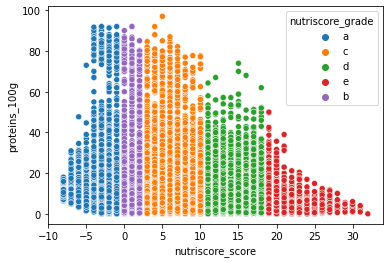

In [143]:
#bimodal
#print(df['nutriscore_score'].shape,df['proteins_100g'].shape,df['nutriscore_grade'].shape)
sns.scatterplot(x = 'nutriscore_score', y = 'proteins_100g',data =df1,hue="nutriscore_grade")
plt.show()

In [210]:
#df1.to_csv('Check_point7.csv',index = False)
df = pd.read_csv('Check_point7.csv')

# <font color='red'> 14) Graphs after filling all the data


In [146]:
df=df1

In [147]:
Energy= df [["energy_100g"]]
REST= df.drop([ "energy_100g"], axis=1)

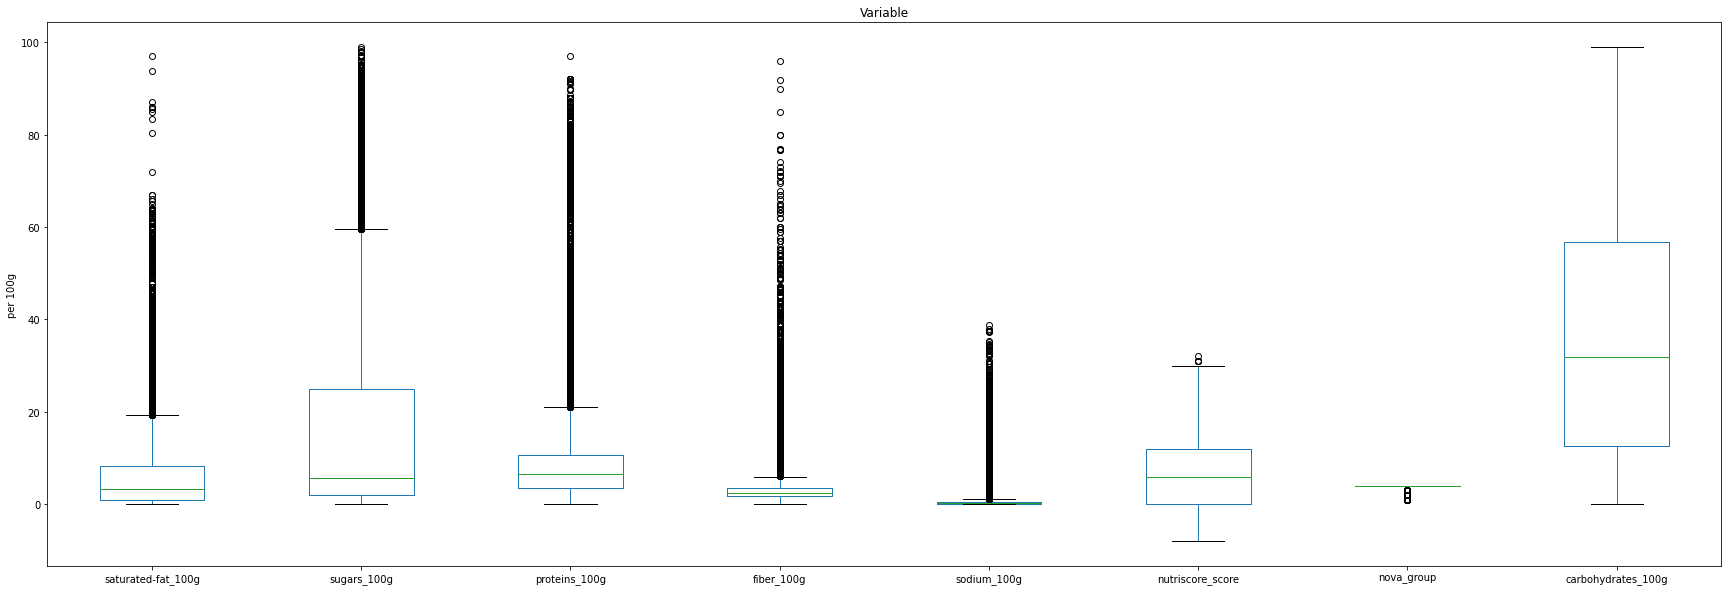

In [148]:
# have to drop the energy and calories because the number are just to high and we can't see the result of the others
REST.plot(kind='box', figsize=(30, 10))
plt.title('Variable')
plt.ylabel('per 100g')
plt.savefig('Box PLot before1')
plt.show()

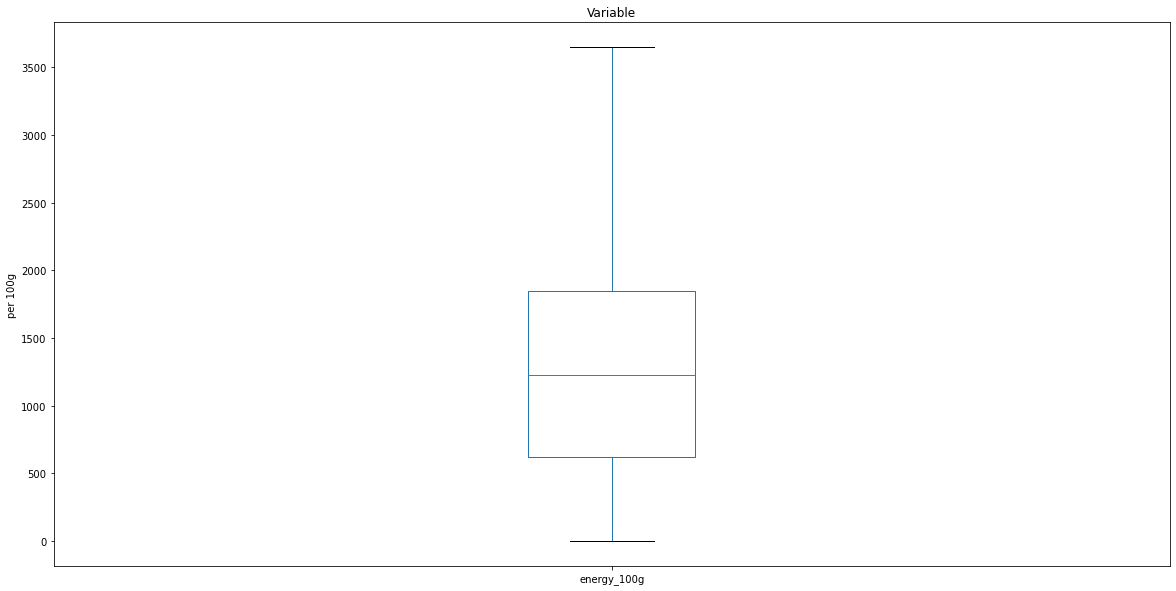

In [149]:
# have to drop the energy and calories because the number are just to high and we can't see the result of the others
Energy.plot(kind='box', figsize=(20, 10))
plt.title('Variable')
plt.ylabel('per 100g')
plt.savefig('Box PLot before2')
plt.show()

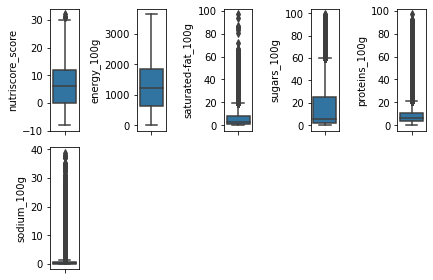

In [150]:

# have to drop the energy and calories because the number are just to high and we can't see the result of the others
#df1.plot(kind='box', figsize=(20, 10))
for i,col in enumerate([ 'nutriscore_score', 'energy_100g', 'saturated-fat_100g',
                  'sugars_100g', 'proteins_100g', 'sodium_100g']):
    #plt.figure(figsize = (8,4))
    plt.subplot(2,5,i+1)
    #fig ,ax = subplots(n_rows,n_cols)
    sns.boxplot(y = col,data = df)
plt.tight_layout()    
plt.show()
    #plt.title('Variable')
    #plt.ylabel('per 100g')

#sns.boxplot(y = current_row =>[columns],data = df)

plt.show()

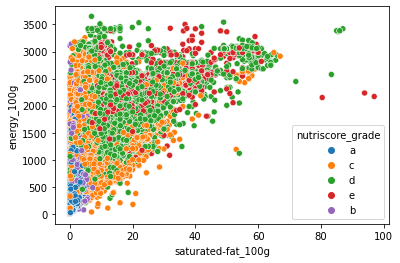

In [152]:
#bimodal

sns.scatterplot(x = 'saturated-fat_100g', y = 'energy_100g',data =df,hue="nutriscore_grade")
plt.show()

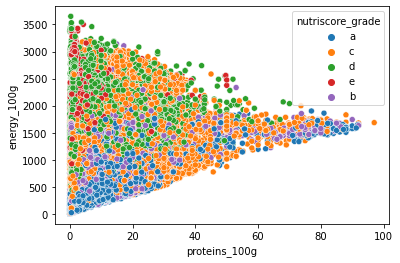

In [153]:
#bimodal

sns.scatterplot(x = 'proteins_100g', y = 'energy_100g',data =df,hue="nutriscore_grade")
plt.show()

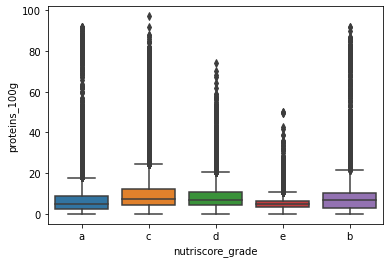

In [154]:
sns.boxplot(x = 'nutriscore_grade', y = 'proteins_100g',data =df)
plt.show()

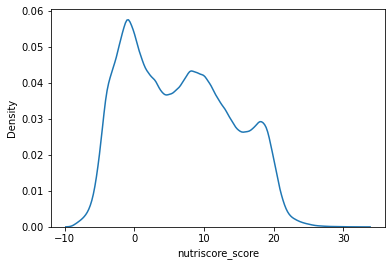

In [155]:
sns.kdeplot(x ='nutriscore_score',data = df)

plt.show()

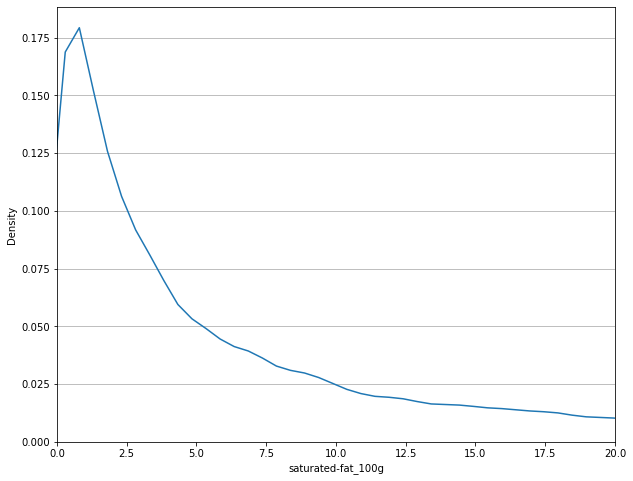

In [156]:
plt.figure(figsize = (10,8))
sns.kdeplot(x ='saturated-fat_100g',data = df)
plt.grid(axis ='y')
plt.xlim(0.0000,20)
plt.show()

Text(0, 0.5, 'number of products')

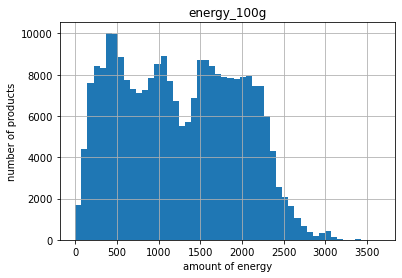

In [157]:
df.hist(column='energy_100g', bins=50)
plt.xlabel("amount of energy")
plt.ylabel("number of products")

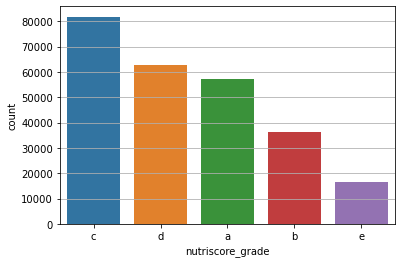

In [158]:
sns.countplot(x ='nutriscore_grade',data = df,order = df['nutriscore_grade'].value_counts().index)
plt.grid(axis = 'y')
plt.show()

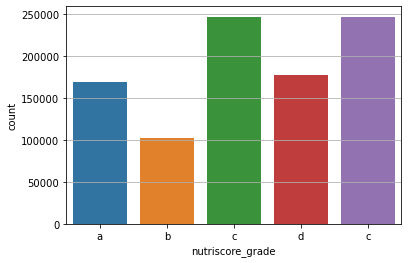

In [81]:
sns.countplot(x ='nutriscore_grade',data = df,order = ['a','b','c','d','e'])
plt.grid(axis = 'y')
plt.show()

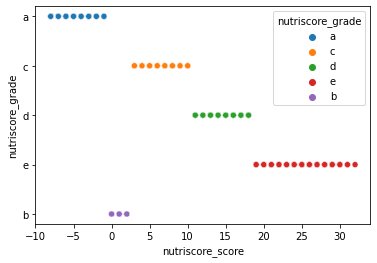

In [166]:
#bimodal

sns.scatterplot(x = 'nutriscore_score', y = 'nutriscore_grade',data =df,hue="nutriscore_grade")
plt.show()

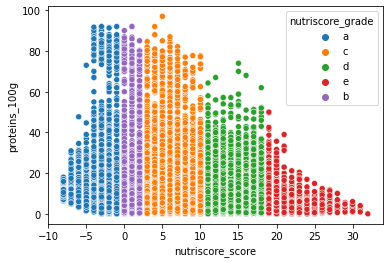

In [160]:
#bimodal
#print(df['nutriscore_score'].shape,df['proteins_100g'].shape,df['nutriscore_grade'].shape)
sns.scatterplot(x = 'nutriscore_score', y = 'proteins_100g',data =df,hue="nutriscore_grade")
plt.show()

# <font color='red'> 10)  Chi2 test </font> 

In [29]:
dfchi.head()

,nova_group,nutriscore_grade,nutriscore_score,energy_100g,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,sodium_100g,salt_100g,fiber_100g,carbohydrates_100g,countries_en
0,NaN,a,-3.0,264.3,63.169216,1.4,0.90,9.8,2.7,0.04,0.10,3.368456,9.800000,Spain
1,NaN,c,8.0,1583.3,375.000000,7.0,3.08,15.0,7.8,0.56,1.40,3.548486,70.100000,France
2,NaN,NaN,NaN,685.8,163.900000,1.9,1.00,NaN,15.3,0.44,1.10,NaN,20.905882,Spain
3,NaN,c,9.0,869.8,874.900000,15.1,6.10,1.0,15.7,0.84,2.10,3.548486,2.600000,Spain
4,NaN,b,0.0,315.0,60.000000,3.0,1.00,3.0,2.0,0.46,1.15,3.352642,10.000000,France


In [36]:
crosstab=pd.crosstab(dfchi['nutriscore_grade'],dfchi['nova_group'])
crosstab

nova_group,1.0,2.0,3.0,4.0
nutriscore_grade,,,,
a,9612,43,13165,34550
b,918,13,8006,27459
c,2502,319,17400,61781
d,294,696,11431,50395
e,18,257,1091,15115


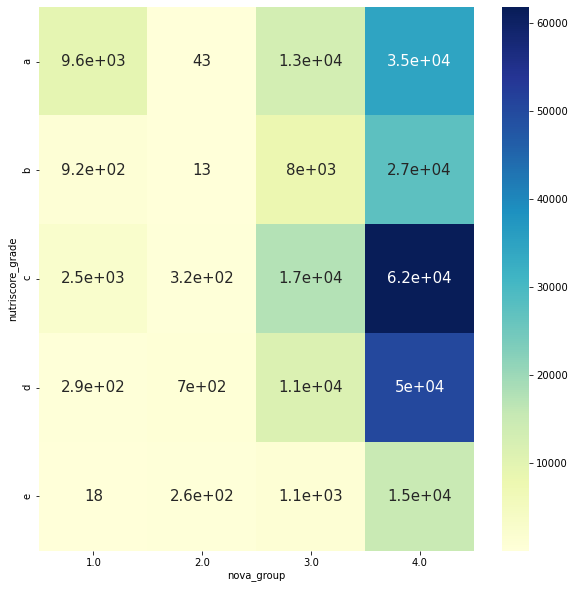

In [41]:
plt.figure(figsize = (10,10))
sns.heatmap(np.abs(crosstab),cmap="YlGnBu", annot = True, annot_kws={'size': 15}, cbar =True,square = True)
plt.show()

In [45]:
data3=dfchi

In [46]:
#The Pearson’s chi-squared statistical hypothesis is an example of a test for independence between categorical variables.
# H₀: The two categorical variables have n are independent (have no relation )
# H₁: There is a relationship between two categorical variables are dependent (have relation)
from scipy.stats import chi2_contingency
def chi2_test(data3):
    
    chi_df = pd.DataFrame({},columns =['Result','Outcome'])
    
    for c in data3.select_dtypes(exclude = 'object').columns:
        crosstab=pd.crosstab(data3['nutriscore_grade'],data3[c])

        chi,p_val,dof,expected=chi2_contingency(crosstab)
        if (p_val < 0.05):
            df = pd.DataFrame({'Result':['have no relationship with Churn'],
                            'Outcome':['reject null hypothesis']})
                
            chi_df = pd.concat([chi_df,df],axis = 0)
            
        else:
            df = pd.DataFrame({'Result':[' have relationship with NutriGrade'],
                              'Outcome':['fail to reject null hypothesis']})
            
            chi_df = pd.concat([chi_df,df],axis = 0)
            
    chi_df.index = data3.select_dtypes(exclude = 'object').columns
    
    return chi_df

In [47]:
chi2_test(dfchi)

,Result,Outcome
nova_group,have no relationship with Churn,reject null hypothesis
nutriscore_score,have no relationship with Churn,reject null hypothesis
energy_100g,have no relationship with Churn,reject null hypothesis
energy-kcal_100g,have no relationship with Churn,reject null hypothesis
fat_100g,have no relationship with Churn,reject null hypothesis
saturated-fat_100g,have no relationship with Churn,reject null hypothesis
sugars_100g,have no relationship with Churn,reject null hypothesis
proteins_100g,have no relationship with Churn,reject null hypothesis
sodium_100g,have no relationship with Churn,reject null hypothesis
salt_100g,have no relationship with Churn,reject null hypothesis


# <font color='red'> 11) Pearson's Correlation test </font> 

In [173]:
corr = round(df.corr( method = 'pearson' ),2)
corr

for i in range(len(corr.columns)):
    for j in range(i+1,len(corr.columns)):
        print('Pearsons correlation ',corr.columns[i],'and',corr.columns[j],': ', corr.iloc[i,j],'\n')
        

Pearsons correlation  energy_100g and saturated-fat_100g :  0.6 

Pearsons correlation  energy_100g and sugars_100g :  0.47 

Pearsons correlation  energy_100g and proteins_100g :  0.23 

Pearsons correlation  energy_100g and fiber_100g :  0.23 

Pearsons correlation  energy_100g and sodium_100g :  -0.03 

Pearsons correlation  energy_100g and nutriscore_score :  0.76 

Pearsons correlation  energy_100g and nova_group :  0.02 

Pearsons correlation  energy_100g and carbohydrates_100g :  0.02 

Pearsons correlation  saturated-fat_100g and sugars_100g :  0.3 

Pearsons correlation  saturated-fat_100g and proteins_100g :  0.06 

Pearsons correlation  saturated-fat_100g and fiber_100g :  -0.0 

Pearsons correlation  saturated-fat_100g and sodium_100g :  -0.04 

Pearsons correlation  saturated-fat_100g and nutriscore_score :  0.71 

Pearsons correlation  saturated-fat_100g and nova_group :  0.0 

Pearsons correlation  saturated-fat_100g and carbohydrates_100g :  0.01 

Pearsons correlation 

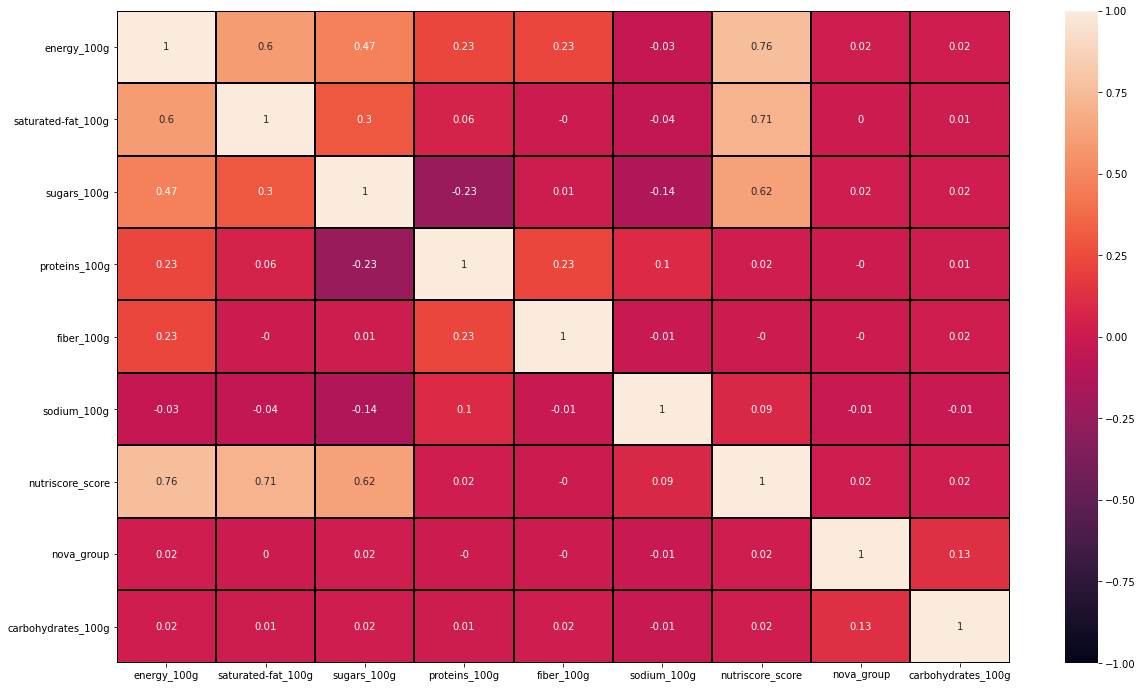

In [174]:
plt.figure(figsize = (20,12))
sns.heatmap(corr,vmin = -1,vmax = 1,cbar = True,annot = True,linewidths=1,linecolor='black')
plt.show()

# <font color='red'> 12) PCA test   </font> 

In [60]:
dfPCA=df.drop(["countries_en"],axis=1)

In [61]:
perc = 1 # Like N %
min_count =  int(((100-perc)/100)*dfPCA.shape[1] + 1)
dfPCA = dfPCA.dropna( axis=0,  thresh=min_count)

In [62]:
dfPCA['nutriscore_grade'] = dfPCA['nutriscore_grade'].replace(['a','b','c','d','e'],[5,4,3,2,1])

In [63]:
from sklearn.preprocessing import MinMaxScaler
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPCA),columns = dfPCA.columns)
df_scaled

,nova_group,nutriscore_score,nutriscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,...,additives_n,proteins_100g_virtual,virtual_energy,Total_grams,sugars_100g_N,energy_100g_N,saturated-fat_100g_N,sodium_100g_N,proteins_100g_N,fiber_100g_N
0,1.000000,0.100,1.00,0.243303,0.246123,0.060204,0.005156,0.305444,0.017172,0.029167,...,0.128205,0.100000,0.246123,0.463640,0.0,0.2,0.0,0.2,1.0,0.4
1,1.000000,0.150,1.00,0.229969,0.237465,0.068367,0.039187,0.277218,0.006061,0.017708,...,0.000000,0.091753,0.237465,0.435000,0.0,0.2,0.3,0.1,1.0,0.2
2,1.000000,0.350,0.50,0.191079,0.192257,0.044898,0.012375,0.234879,0.046465,0.028125,...,0.051282,0.086598,0.192257,0.396800,0.1,0.2,0.1,1.0,1.0,0.4
3,1.000000,0.125,1.00,0.126632,0.126829,0.082653,0.009281,0.057460,0.014141,0.017708,...,0.025641,0.040206,0.126829,0.180100,0.0,0.1,0.0,0.1,0.4,0.2
4,1.000000,0.300,0.50,0.236636,0.240314,0.063265,0.008250,0.302419,0.017172,0.032292,...,0.051282,0.083505,0.240314,0.496900,0.0,0.2,0.0,1.0,1.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238887,1.000000,0.125,1.00,0.005516,0.006685,0.002041,0.002062,0.005040,0.005051,0.002083,...,0.000000,0.005155,0.006685,0.012254,0.0,0.0,0.0,0.0,0.0,0.0
238888,0.666667,0.150,1.00,0.062104,0.063784,0.028571,0.018562,0.047379,0.047475,0.024410,...,0.000000,0.029897,0.063784,0.105300,0.1,0.0,0.1,0.0,0.2,0.4
238889,1.000000,0.625,0.25,0.490207,0.505644,0.408163,0.164999,0.005040,0.005051,0.019528,...,0.076923,0.216495,0.505644,0.655000,0.0,0.5,1.0,1.0,1.0,0.2
238890,0.666667,0.175,1.00,0.133299,0.126062,0.032653,0.003094,0.021169,0.005051,0.054167,...,0.000000,0.185567,0.126062,0.248000,0.0,0.1,0.0,0.6,1.0,1.0


due to the constraint of my computer. I was forced to do simple PCA tests

ell PCA, as suggested above by does help you remove features with the least correlation and use mash the features together such that they have the highest correlation.

To answer your question, how to visualize higher dimensions using PCA

Transform the feature matrix with the number of components of your data set to 2 or 3
This ensures you can represent your dataset in 2 or 3 dimensions. To simply see your answer just plot this transformed matrix into a 2d or 3d plot respectively.
This helps you visualize a higher dimensionality data as a 2d or 3d entity so while using regression or some predictive modeling technique you can assess the trend of data.
Should we use PCA in machine learning algorithms more often?

Well, that strictly depends, using PCA reduces the accuracy of your data set so unless you need to save up some space caused due to a lot of features with bad correlation and the overall accuracy doesn't matter. If your machine learning model scenario is similar to this then it is ok to proceed.

However, most use of PCA is as you asked before for visualizing higher dimensionality data to determine the data trend and to check which model fits best.


It is often the case that to solve a machine learning problem we have to deal with multiple features. Because of this, the learning process can take a long time and sometimes the solution is not acceptable. This is the curse of dimensionality. To deal with the above problems sometimes it is enough to reduce the number of features. But by reducing dimensionality we lose some information. Therefore, we should get rid of the information that does not interfere with the model. Sometimes we can remove noise and irrelevant details, so a model will achieve better results on a test set. When two independent variables interact very strongly, i.e., the correlation coefficient is close to 1 or -1, we provide the algorithm with the same information in two dimensions, which is redundancy. It is an unnecessary increase in dimensionality.

In [64]:
from sklearn.preprocessing import MinMaxScaler
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPCA),columns = dfPCA.columns)
df_scaled

,nova_group,nutriscore_score,nutriscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,...,additives_n,proteins_100g_virtual,virtual_energy,Total_grams,sugars_100g_N,energy_100g_N,saturated-fat_100g_N,sodium_100g_N,proteins_100g_N,fiber_100g_N
0,1.000000,0.100,1.00,0.243303,0.246123,0.060204,0.005156,0.305444,0.017172,0.029167,...,0.128205,0.100000,0.246123,0.463640,0.0,0.2,0.0,0.2,1.0,0.4
1,1.000000,0.150,1.00,0.229969,0.237465,0.068367,0.039187,0.277218,0.006061,0.017708,...,0.000000,0.091753,0.237465,0.435000,0.0,0.2,0.3,0.1,1.0,0.2
2,1.000000,0.350,0.50,0.191079,0.192257,0.044898,0.012375,0.234879,0.046465,0.028125,...,0.051282,0.086598,0.192257,0.396800,0.1,0.2,0.1,1.0,1.0,0.4
3,1.000000,0.125,1.00,0.126632,0.126829,0.082653,0.009281,0.057460,0.014141,0.017708,...,0.025641,0.040206,0.126829,0.180100,0.0,0.1,0.0,0.1,0.4,0.2
4,1.000000,0.300,0.50,0.236636,0.240314,0.063265,0.008250,0.302419,0.017172,0.032292,...,0.051282,0.083505,0.240314,0.496900,0.0,0.2,0.0,1.0,1.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238887,1.000000,0.125,1.00,0.005516,0.006685,0.002041,0.002062,0.005040,0.005051,0.002083,...,0.000000,0.005155,0.006685,0.012254,0.0,0.0,0.0,0.0,0.0,0.0
238888,0.666667,0.150,1.00,0.062104,0.063784,0.028571,0.018562,0.047379,0.047475,0.024410,...,0.000000,0.029897,0.063784,0.105300,0.1,0.0,0.1,0.0,0.2,0.4
238889,1.000000,0.625,0.25,0.490207,0.505644,0.408163,0.164999,0.005040,0.005051,0.019528,...,0.076923,0.216495,0.505644,0.655000,0.0,0.5,1.0,1.0,1.0,0.2
238890,0.666667,0.175,1.00,0.133299,0.126062,0.032653,0.003094,0.021169,0.005051,0.054167,...,0.000000,0.185567,0.126062,0.248000,0.0,0.1,0.0,0.6,1.0,1.0


In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df_scaled)

PCA(n_components=3)

In [66]:
principalComponents = pca.transform(df_scaled)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])#,'principal component 4'
                         #,'principal component 5','principal component 6'])

principal_df

,principal component 1,principal component 2,principal component 3
0,-0.620496,-0.286893,0.260550
1,-0.526186,-0.197252,0.023981
2,-0.391503,-0.520074,-0.249925
3,-0.990564,0.245632,-0.055995
4,-0.375136,-0.639076,-0.057013
...,...,...,...
238887,-1.266222,0.655916,-0.250403
238888,-1.050755,0.437724,0.077659
238889,0.497993,-0.714062,-0.892877
238890,-0.848870,-0.606373,0.358579


In [67]:
for i in pca.explained_variance_:
    j = 1
    print('principal component ',j,' explained variance =>',(i/ pca.explained_variance_.sum())*100)


principal component  1  explained variance => 59.43633788651827
principal component  1  explained variance => 22.778794041238065
principal component  1  explained variance => 17.784868072243672


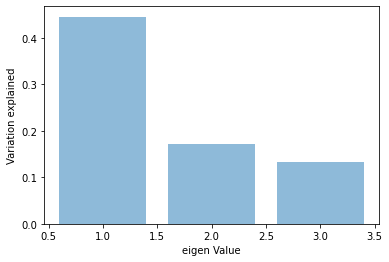

In [68]:
plt.bar(np.arange(1,4),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()


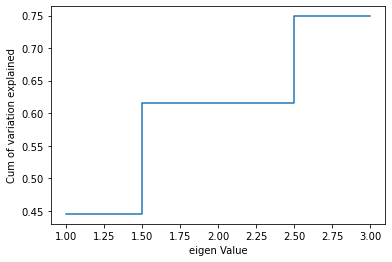

In [69]:
plt.step(np.arange(1,4),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

<Figure size 100x100 with 0 Axes>

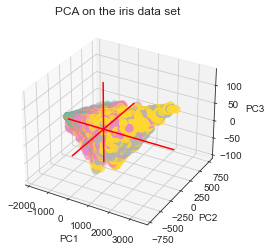

In [73]:
# libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
 
# Get the iris dataset
sns.set_style("white")
df = dfPCA#sns.load_dataset('iris')

# create figure
my_dpi=96
plt.figure(figsize=(100/my_dpi, 100/my_dpi), dpi=my_dpi)
 
# Keep the 'species' column appart + make it numeric for coloring
df['nutriscore_grade']=pd.Categorical(df['nutriscore_grade'])
my_color=df['nutriscore_grade'].cat.codes
df = df.drop('nutriscore_grade', 1)
 
# Run The PCA
pca = PCA(n_components=3)
pca.fit(df)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show()

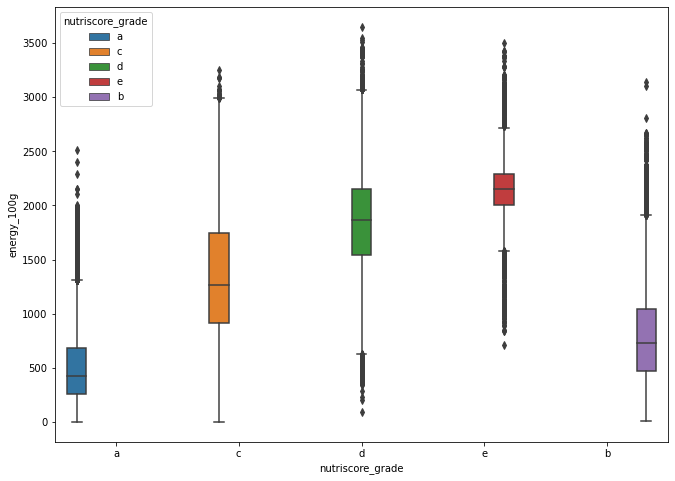

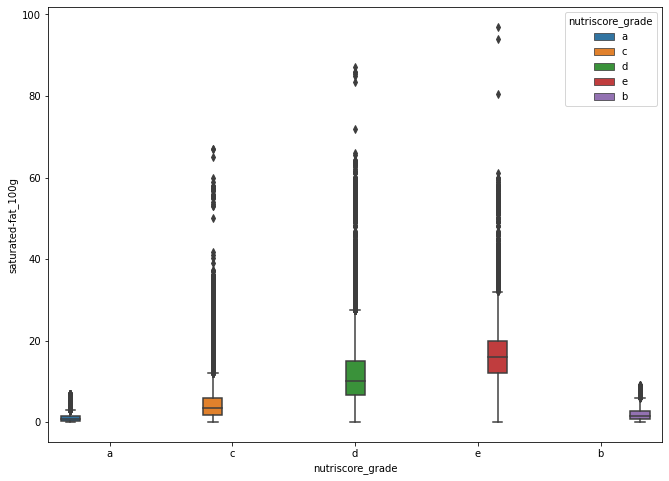

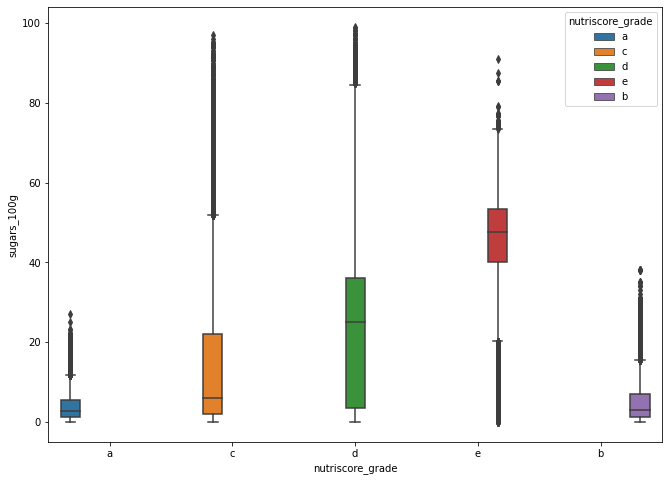

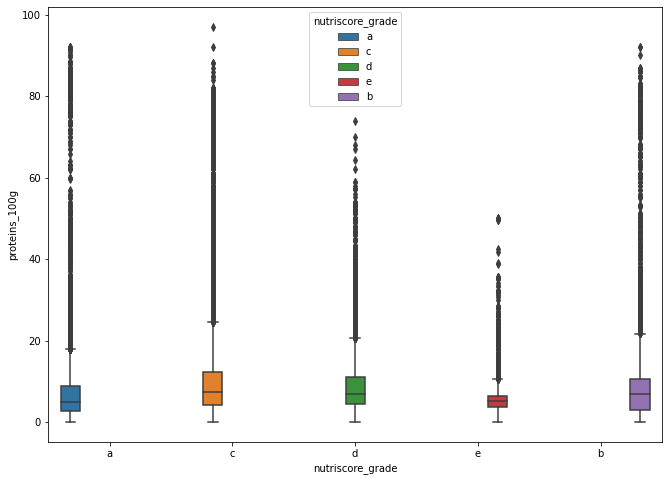

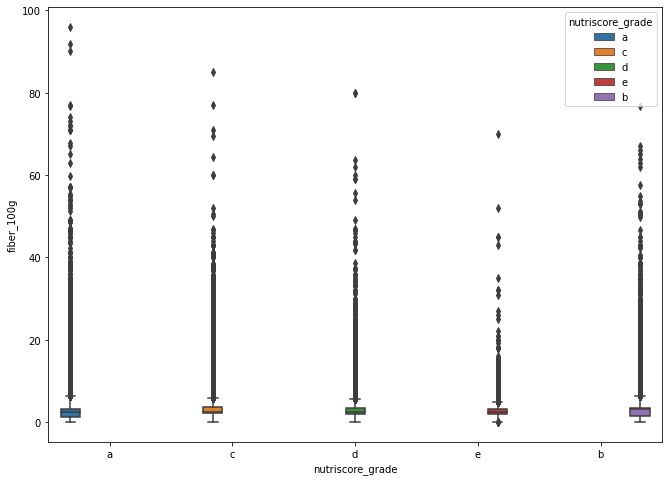

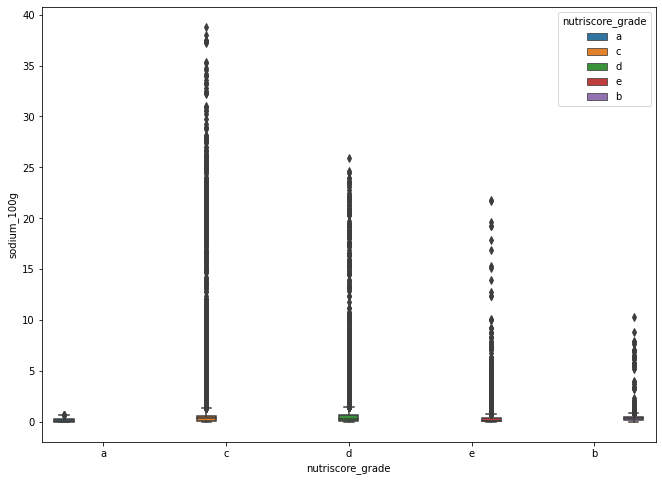

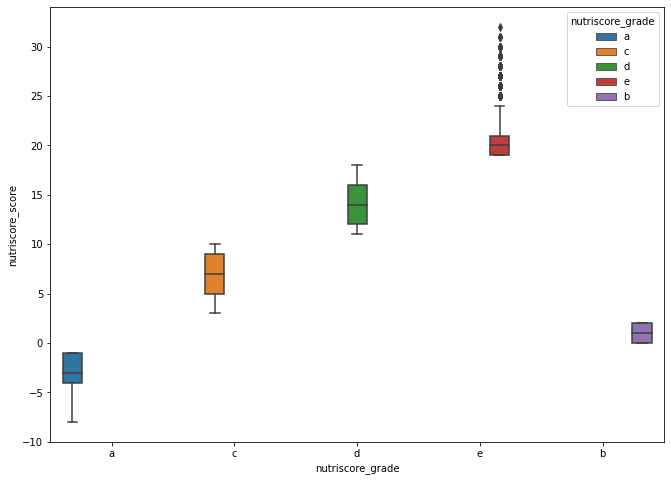

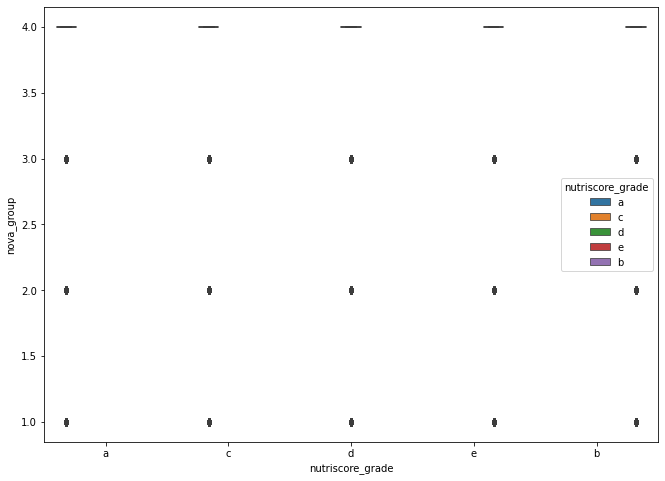

In [195]:
#Bi 
cols = df.select_dtypes(exclude = 'object').columns
for i in range(1,len(cols)):
    plt.figure(figsize = (11,8))
    sns.boxplot(y = cols[i-1],x = 'nutriscore_grade',data =  df,hue = 'nutriscore_grade')
    plt.show()

KeyboardInterrupt: 

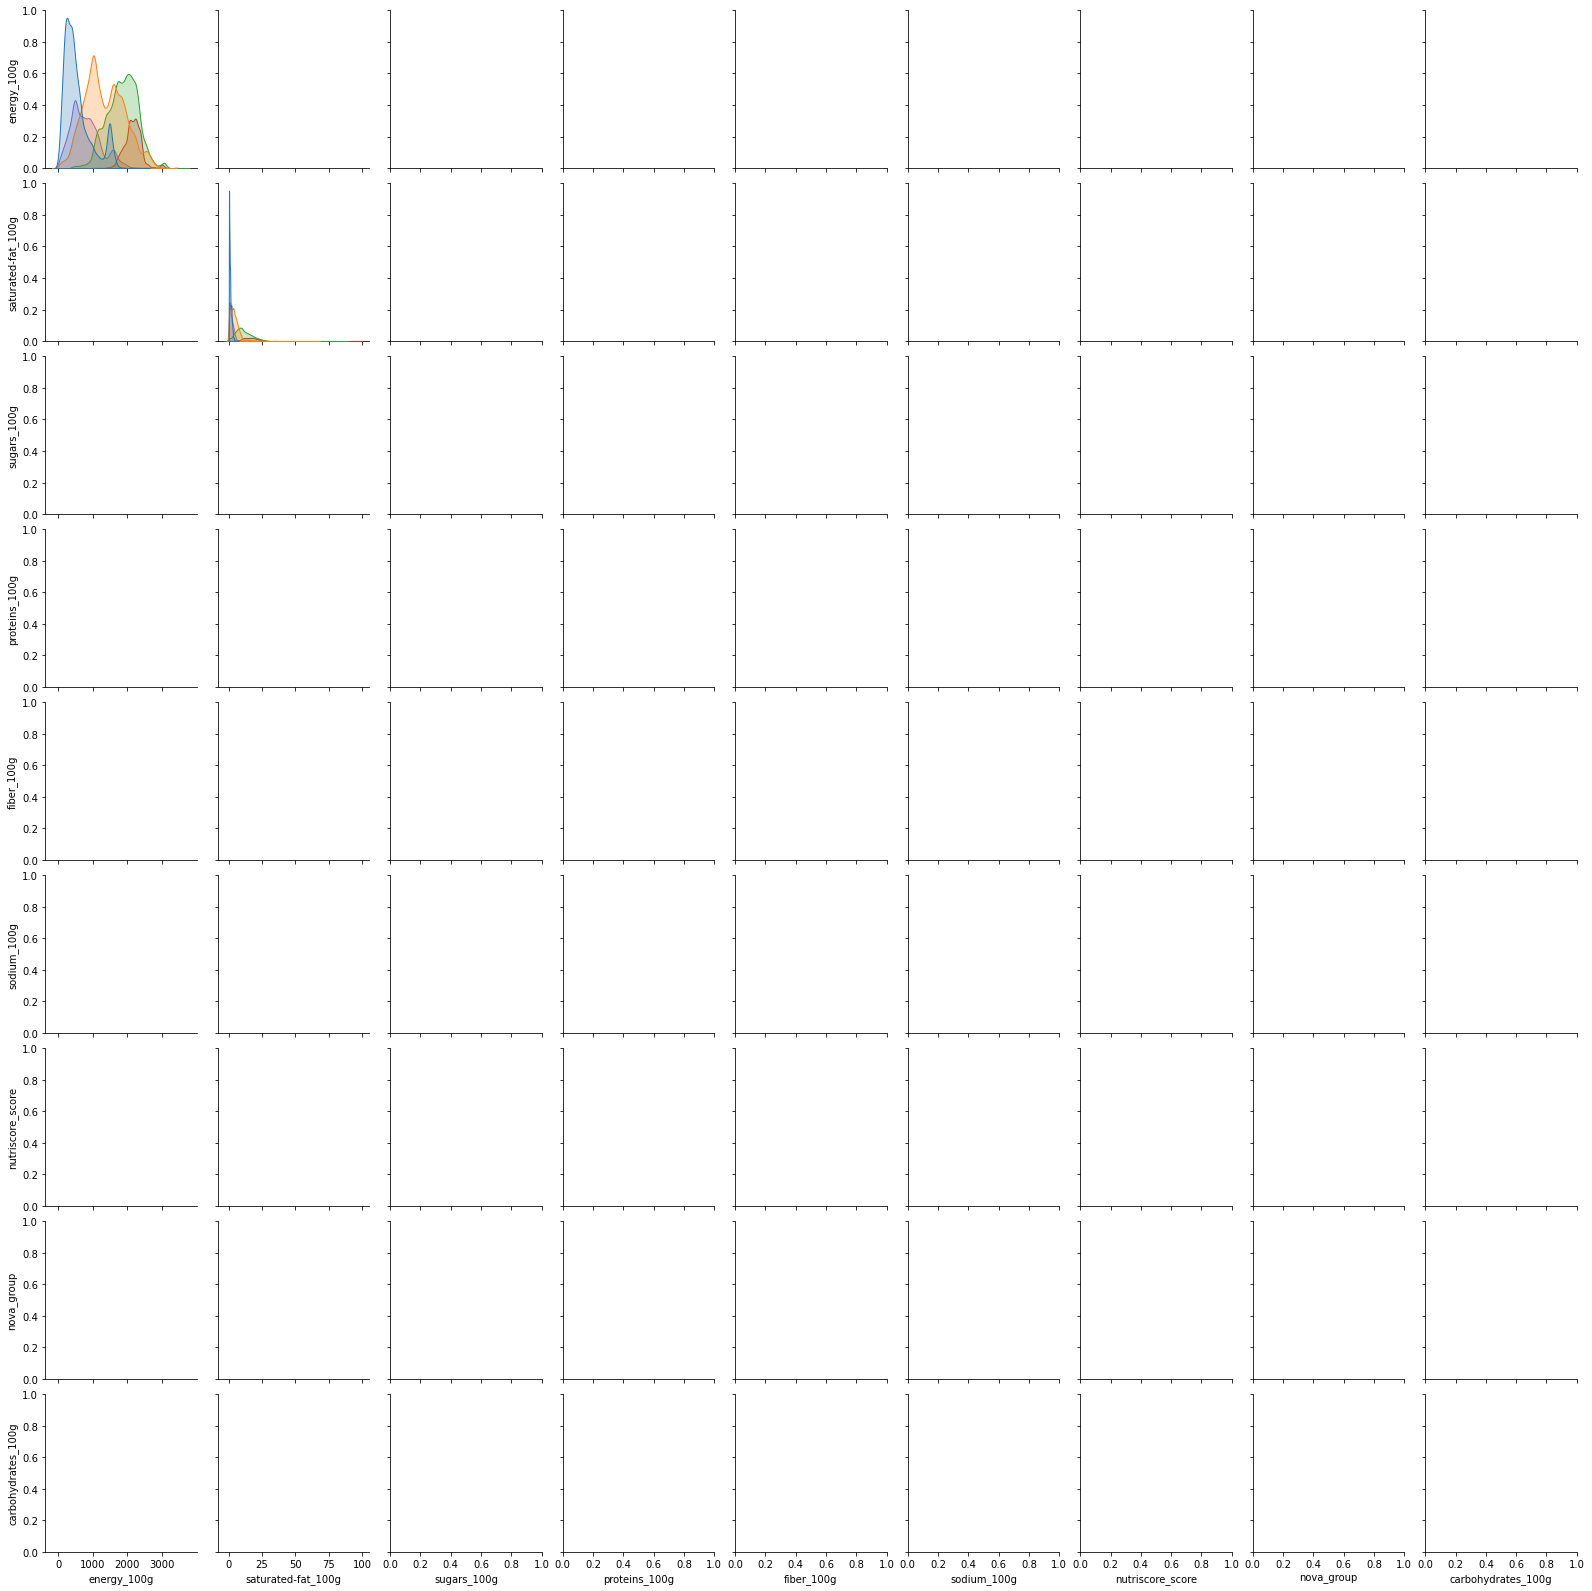

In [196]:
sns.pairplot(df ,hue="nutriscore_grade")
plt.show()

# <font color='red'> 12) ANOVA</font> 

In [202]:
num_cols = df.select_dtypes(exclude = 'object').columns
num_cols

Index(['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
       'fiber_100g', 'sodium_100g', 'nutriscore_score', 'nova_group',
       'carbohydrates_100g'],
      dtype='object')

In [203]:
Product_102= df
# H0:  All Means are equal
# HA : all means are not equal
def one_way_anova(Product_102):
    gp_a = (Product_102['nutriscore_grade'] == 'a')
    gp_b = (Product_102['nutriscore_grade'] == 'b')
    gp_c = (Product_102['nutriscore_grade'] == 'c')
    gp_d = (Product_102['nutriscore_grade'] == 'd')
    gp_e = (Product_102['nutriscore_grade'] == 'e')
    

    stats_df = pd.DataFrame({},columns =['Result','Outcome'])
    for c in num_cols:
        sample_a = Product_102.loc[gp_a,c]
        sample_b = Product_102.loc[gp_b,c]
        sample_c = Product_102.loc[gp_c,c]
        sample_d = Product_102.loc[gp_d,c]
        sample_e = Product_102.loc[gp_e,c]
        stats,p_val = f_oneway(sample_a ,sample_b ,sample_c ,sample_d ,sample_e )
        if (p_val < 0.05):
            df = pd.DataFrame({'Result':['means are not equal'],
                            'Outcome':['reject null hypothesis']})
                
            stats_df = pd.concat([stats_df,df],axis = 0)
            
        else:
            df = pd.DataFrame({'Result':['mean equal'],
                              'Outcome':['fail to reject null hypothesis']})
            
            stats_df = pd.concat([stats_df,df],axis = 0)
            
    stats_df.index = num_cols
    
    return stats_df

In [204]:
anova_df = one_way_anova(Product_102)
anova_df

,Result,Outcome
energy_100g,means are not equal,reject null hypothesis
saturated-fat_100g,means are not equal,reject null hypothesis
sugars_100g,means are not equal,reject null hypothesis
proteins_100g,means are not equal,reject null hypothesis
fiber_100g,means are not equal,reject null hypothesis
sodium_100g,means are not equal,reject null hypothesis
nutriscore_score,means are not equal,reject null hypothesis
nova_group,mean equal,fail to reject null hypothesis
carbohydrates_100g,mean equal,fail to reject null hypothesis


# <font color='red'>Knap Sack</font> 

In [4]:
df = pd.read_csv('Check_point1.csv')
#df.to_csv('Check_point7.csv',index = False)

In [59]:
df

,nova_group,nutriscore_score,nutriscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,...,additives_n,proteins_100g_virtual,virtual_energy,Total_grams,sugars_100g_N,energy_100g_N,saturated-fat_100g_N,sodium_100g_N,proteins_100g_N,fiber_100g_N
0,NaN,-2.0,a,63.169216,264.3,1.4,0.90,9.800000,9.8,NaN,...,0.0,2.7,264.3,14.000000,2.0,0.0,0.0,0.0,1.0,NaN
1,NaN,9.0,c,375.000000,1583.3,7.0,3.08,70.100000,15.0,NaN,...,NaN,7.8,1583.3,86.300000,3.0,4.0,3.0,6.0,4.0,NaN
2,NaN,NaN,NaN,163.900000,685.8,1.9,1.00,20.905882,NaN,NaN,...,NaN,15.3,685.8,39.205882,NaN,2.0,0.0,4.0,5.0,NaN
3,NaN,9.0,c,874.900000,869.8,15.1,6.10,2.600000,1.0,NaN,...,NaN,15.7,869.8,35.500000,0.0,2.0,6.0,9.0,5.0,NaN
4,NaN,1.0,b,60.000000,315.0,3.0,1.00,10.000000,3.0,NaN,...,NaN,2.0,315.0,16.150000,0.0,0.0,0.0,5.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820436,NaN,14.0,d,401.000000,1674.0,14.0,6.50,64.000000,36.0,NaN,...,NaN,4.0,1674.0,82.480000,7.0,4.0,6.0,2.0,2.0,NaN
820437,NaN,4.0,c,150.000000,632.0,6.1,4.30,21.000000,14.0,3.276655,...,NaN,2.9,632.0,30.080000,3.0,1.0,4.0,0.0,1.0,3.0
820438,NaN,8.0,c,333.000000,1398.5,20.2,6.00,30.900000,10.4,2.494675,...,NaN,7.4,1398.5,59.600000,2.0,4.0,5.0,4.0,4.0,2.0
820439,4.0,8.0,c,221.080306,920.4,7.6,4.80,35.000000,24.0,2.494675,...,2.0,2.6,920.4,45.480000,5.0,2.0,4.0,1.0,1.0,2.0


In [8]:
dfKNAP=df[[ "nutriscore_grade","energy-kcal_100g","fat_100g","saturated-fat_100g","proteins_100g","sodium_100g","countries_en"]]

In [9]:
# dfKNAP  ===  is the dataframe I am using when the code is running from point 14
dfKNAP

,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,proteins_100g,sodium_100g,countries_en
0,a,63.169216,1.4,0.90,2.7,0.040,Spain
1,c,375.000000,7.0,3.08,7.8,0.560,France
2,NaN,163.900000,1.9,1.00,15.3,0.440,Spain
3,c,874.900000,15.1,6.10,15.7,0.840,Spain
4,b,60.000000,3.0,1.00,2.0,0.460,France
...,...,...,...,...,...,...,...
820436,d,401.000000,14.0,6.50,4.0,0.192,France
820437,c,150.000000,6.1,4.30,2.9,0.032,France
820438,c,333.000000,20.2,6.00,7.4,0.440,France
820439,c,221.080306,7.6,4.80,2.6,0.112,Germany


In [10]:
#perc = 1 # Like N %
#min_count =  int(((100-perc)/100)*dfX.shape[1] + 1)
dfKNAP = dfKNAP.dropna( axis=0)#,  thresh=min_count)
dfKNAP
#df# = df.dropna(thresh=len(df.columns)-1)

,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,proteins_100g,sodium_100g,countries_en
0,a,63.169216,1.4,0.90,2.7,0.040,Spain
1,c,375.000000,7.0,3.08,7.8,0.560,France
3,c,874.900000,15.1,6.10,15.7,0.840,Spain
4,b,60.000000,3.0,1.00,2.0,0.460,France
5,a,32.000000,0.3,0.10,0.9,0.168,France
...,...,...,...,...,...,...,...
820436,d,401.000000,14.0,6.50,4.0,0.192,France
820437,c,150.000000,6.1,4.30,2.9,0.032,France
820438,c,333.000000,20.2,6.00,7.4,0.440,France
820439,c,221.080306,7.6,4.80,2.6,0.112,Germany


In [11]:
dfKNAP.loc[757770,:]

nutriscore_grade          d
energy-kcal_100g      551.0
fat_100g               44.0
saturated-fat_100g     26.7
proteins_100g           8.0
sodium_100g           0.004
countries_en          Spain
Name: 757770, dtype: object

In [12]:
def check_full(gender,remaining_fat ,fat,remaining_protein,protein,remaining_sodium,sodium):
    f,p,s =0,0,0
    if gender == 'male':
        f = 96.25
        p = 56
        s = 2.3
    else:
        f = 77
        p = 46
        s = 2.3
    
    if(remaining_fat + fat <= f): 
        
        if(remaining_protein + protein <= p):
            if(remaining_sodium + sodium <= s):
                
                remaining_fat =  remaining_fat + fat 
                remaining_protein = remaining_protein + protein
                remaining_sodium = remaining_sodium + sodium
               
                return True,remaining_fat,remaining_protein,remaining_sodium 
            
            else:
                
                return False,remaining_fat,remaining_protein,remaining_sodium
        
        else:
            return False,remaining_fat,remaining_protein,remaining_sodium
            
    else:
        return False,remaining_fat,remaining_protein,remaining_sodium
    
def knapsack(df,product,gender):
    df = df.sample(frac =1).reset_index(drop = True,inplace= False) # this shuffle the data so we don't get the same answer always
    add_list = [] # adding product index which are revelent to us. the product that satsfies the condition we have created will be put here.
    if gender == 'male':
        f = 96.25
        p = 56
        s = 2.3
        c = 2500
    else:
        f = 77
        p = 46
        s = 2.3
        c = 2000
    
    remaining_fat,remaining_protein,remaining_sodium,remaining_cal= (f - product['fat_100g']) ,(p - product['proteins_100g']),(s - product['sodium_100g']), (c - product['energy-kcal_100g'])
    # this line will give the remaining values on prodien, Fat, calories and Sodium for the Knapsack to work on. 
    #this remaining values are calculated by removing the product we have inserted.
    for i in range(df.shape[0]): # this is loop to see each product one by one if it satisfy the condition we have put above
     
        fat,protein,sodium,cal= df.loc[i,'fat_100g'],df.loc[i,'proteins_100g'],df.loc[i,'sodium_100g'],df.loc[i,'energy-kcal_100g']
        # the above line gives values of cal,protein,fat,sodium of current product we
        # are considering to check whether it satisfyies our condition or not
        if gender == 'male':
            if ((remaining_cal+cal) <= c):
                result = check_full(gender,remaining_fat ,fat,remaining_protein,protein,remaining_sodium,sodium)

                if (result[0]):
                    add_list.append(df.loc[i,'index'])
                    remaining_fat,remaining_protein,remaining_sodium = result[1:]
                    remaining_cal = remaining_cal + cal
            
        else:
            
            if ((remaining_cal + cal) <= c):
                
                result = check_full(gender,remaining_fat ,fat,remaining_protein,protein,remaining_sodium,sodium)
                
                if (result[0]):
                    add_list.append(df.loc[i,'index'])
                    remaining_fat,remaining_protein,remaining_sodium = result[1:]
                    remaining_cal = remaining_cal + cal
            
    return add_list
        
          
    

In [14]:
products= dfKNAP

gender = 'male'#  correct
product = products.loc[1,:]# correct

df = products[products['countries_en'] == product['countries_en']]# correct
df.reset_index(inplace= True)# causing new line to create if inplace is True

item_list = knapsack(df,product,gender)
item_list

[817828,
 687385,
 340569,
 765510,
 392415,
 129819,
 710874,
 560482,
 350741,
 803103,
 605460,
 224798,
 577824]

In [16]:
products.loc[item_list,:]

,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,proteins_100g,sodium_100g,countries_en
817828,a,91.76,2.6400,1.9200,4.240000,0.000030,France
687385,a,177.00,1.3000,0.3000,2.400000,0.024000,France
340569,a,27.00,0.6000,0.4000,0.800000,0.232000,France
765510,a,26.00,0.5000,0.5000,0.100000,0.040000,France
392415,a,30.40,0.2000,0.0100,0.100000,0.040000,France
129819,a,1.00,0.1000,0.1000,0.100000,0.140000,France
710874,a,15.00,0.0500,0.0100,0.050000,0.025200,France
560482,a,1.00,0.1000,0.0010,0.000801,0.000004,France
350741,a,1.00,0.0010,0.0010,0.001000,0.000004,France
803103,a,1.00,0.0001,0.0001,0.000100,0.000040,France
